## Exercice 1 (LinearRegression)

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [10]:
X1 = 2 * np. random . rand (100 , 1)
y1 = 4 + 3 * X1 + np. random . randn (100 , 1)

X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1, test_size = 0.2,random_state=42)
# Split and Standardize the data
independent_scaler = StandardScaler()
X1_train = independent_scaler.fit_transform(X1_train)
X1_test = independent_scaler.transform(X1_test)

reg1 = LinearRegression().fit(X1_train, y1_train)
y1_pred = reg1.predict(X1_test)

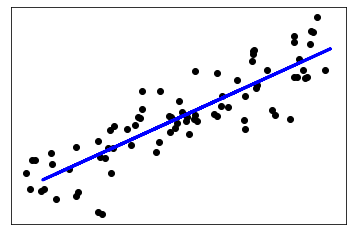

In [12]:
# Plot outputs
plt.scatter(X1_train, y1_train, color='black')
plt.plot(X1_test, y1_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Exercice 2 (Polynomial regression)

In [62]:
m = 100
X2 = 6 * np. random . rand (m, 1) - 3
y2 = 0.5 * X2**2 + X2 + 2 + np. random . randn (m, 1)

X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2, test_size = 0.2,random_state=42)
# Split and Standardize the data
independent_scaler = StandardScaler()
X2_train = independent_scaler.fit_transform((X2_train.reshape(-1,1)))
X2_test = independent_scaler.transform((X2_test.reshape(-1,1)))

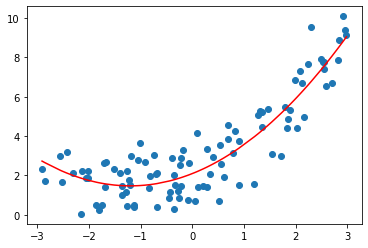

In [63]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X2_poly = poly_features.fit_transform(X2.reshape(-1,1))

lin = LinearRegression()

lin.fit(X2_poly,y2)
y2_pred = lin.predict(X2_poly)

idx = X2.argsort()

plt.scatter(X2, y2)
plt.plot(X2[idx],y2_pred[idx],color='red')
plt.show()

## Exercice 3

In [46]:
#pour Linear Regression

mse1 = np.sqrt(mean_squared_error(y1_test, y1_pred))
r21 = r2_score(y1_test, y1_pred)
print(mse1)
print(r21)
# Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error.
# The r2 score varies between 0 and 100%. So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all.

0.949701681167094
0.7578132190941824


In [66]:
# pour Polymonial Regression

mse2 = np.sqrt(mean_squared_error(y2,y2_pred))
r2 = r2_score(y2,y2_pred)
print(mse2)
print(r2)

1.0405543966881712
0.820507178293021


## Exercice 4 (SVR regression kernel=poly)

In [68]:
from sklearn.svm import SVR

In [69]:
m = 100
X2 = 6 * np. random . rand (m, 1) - 3
y2 = 0.5 * X2**2 + X2 + 2 + np. random . randn (m, 1)

X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2, test_size = 0.2,random_state=42)
# Split and Standardize the data
independent_scaler = StandardScaler()
X2_train = independent_scaler.fit_transform(X2_train)
X2_test = independent_scaler.transform(X2_test)


#svr regression with poly kernel

svr_poly = SVR(kernel='poly', C=100, gamma='auto')
y2_poly = svr_poly.fit(X2_train, y2_train).predict(X2_test)

C:\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [72]:
rmse = np.sqrt(mean_squared_error(y2_test,y2_poly))
r2 = r2_score(y2_test,y2_poly)
print(rmse)
print(r2)
# Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error.
# The r2 score varies between 0 and 100%. So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all.

2.3448028190991934
0.2613662728025882


## Exercice 5 (Ridge regression)

In [89]:
from sklearn.linear_model import Ridge

In [90]:
m = 100
X2 = 6 * np. random . rand (m, 1) - 3
y2 = 0.5 * X2**2 + X2 + 2 + np. random . randn (m, 1)

X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2, test_size = 0.2,random_state=42)
# Split and Standardize the data
independent_scaler = StandardScaler()
X2_train = independent_scaler.fit_transform(X2_train)
X2_test = independent_scaler.transform(X2_test)


# Ridge regression model
clf = Ridge(alpha=1.0)
clf.fit(X2_train, y2_train)
y_pred_clf = clf.predict(X2_test)
# print(pred_clf)

In [91]:
mse = np.sqrt(mean_squared_error(y2_test,y_pred_clf))
r2 = r2_score(y2_test,y_pred_clf)
print(mse)
print(r2)

1.6705852830292724
0.5173093050751068


## Exercice 6 (Lasso regression)

In [92]:
from sklearn import linear_model

In [93]:
m = 100
X2 = 6 * np. random . rand (m, 1) - 3
y2 = 0.5 * X2**2 + X2 + 2 + np. random . randn (m, 1)

X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2, test_size = 0.2,random_state=42)
# Split and Standardize the data
independent_scaler = StandardScaler()
X2_train = independent_scaler.fit_transform(X2_train)
X2_test = independent_scaler.transform(X2_test)

# Lasso regression model

clf = linear_model.Lasso(alpha=0.1)
clf.fit(X2_train, y2_train)
y_pred_clf = clf.predict(X2_test)

In [94]:
mse = np.sqrt(mean_squared_error(y2_test,y_pred_clf))
r2 = r2_score(y2_test,y_pred_clf)
print(mse)
print(r2)

1.7100092406071803
0.5337001742752496


## Exercice 7 : California Housing dataset

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import metrics

from sklearn.datasets import fetch_california_housing

In [48]:
california = fetch_california_housing()

df = pd.DataFrame(data= np.c_[california['data'], california['target']],
                     columns= california['feature_names'] + ['target'])

In [49]:
# df.head()
# df.info()

In [50]:
# df.describe()

In [51]:
# df.hist(bins=50, figsize=(20,15))

In [52]:
df.dropna(how='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [53]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size = 0.2,random_state=42)

In [54]:
# Standardize the data
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)

In [55]:
# y_train = y_train.values.reshape(-1,1)
# y_test = y_test.values.reshape(-1,1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

## Linear regression model

In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(rmse)
print(r2)

0.7455813830127762
0.575787706032451


## SVR Regression model using a poly kernel

In [57]:
from sklearn.svm import SVR

In [ ]:
svr_poly = SVR(kernel='poly', C=100, gamma='auto')
y_pred = svr_poly.fit(X_train, y_train).predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(rmse)
print(r2)

## Ridge Regression

In [8]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_clf))
r2 = r2_score(y_test,y_pred_clf)
print(rmse)
print(r2)

0.7455567442814779
0.5758157428913684


## Lasso regression

In [28]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
y_pred_clf2 = clf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_clf2))
r2 = r2_score(y_test,y_pred_clf2)
print(rmse)
print(r2)

0.8243961598848472
0.48136113250290735
